In [23]:
import pandas as pd
import os
import json
import re
import torch
import string


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [25]:
import matplotlib.pyplot as plt

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 6.8 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 137.5 MB/s eta 0:00:01
     |████████████████████████████████| 200 kB 159.7 MB/s eta 0:00:01


In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 1.3 MB 2.8 MB/s eta 0:00:01


In [17]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
s = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

/opt/conda/lib/python3.8/site-packages/transformers/models/auto/modeling_auto.py:1295: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)
/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


In [6]:
def get_emotion(text):
    input_ids = tokenizer.encode(str(text) + '</s>', return_tensors='pt')
    output = model.generate(input_ids=input_ids,
               max_length=2)
    dec = [tokenizer.decode(ids) for ids in output]
    label = dec[0]
    return label
get_emotion("Research trips with founder through Asia and Chief Investment Officer/CEO through Europe during\xa0\xa0 the Asian Financial crisis") # Output: 'joy'


'<pad> fear'

In [7]:
file_path = []
file_name = []
home_path = '/workspace/deerproject2/Data/Json/'
label = []
classification = ['Good','Bad','Inter']
for c in classification:
    path1 = home_path + c 
    filename = os.listdir(path1)
    for name in filename:
        if name != '.ipynb_checkpoints':
            file_path.append(path1 + '/' + name)

            if c == 'Good':
                label.append(2)
            elif c == 'Inter':
                label.append(1)
            elif c == 'Bad':
                label.append(0)
            file_name.append(name)

In [13]:
sentence_fear = ''
sentence_joy = ''
final = []
for file in file_path:
    try:
        with open(file) as f:
            data = json.load(f)
    except:
        final.append({'joy':0,'fear':0,'sadness':0,'anger':0,'love':0,'surprise':0})
        continue
    document = {'joy':0,'fear':0,'sadness':0,'anger':0,'love':0,'surprise':0}
    count = 0
    for item in data:
        count += 1
        try:
            text = list(item.values())[0]
        except:
            continue
        result = get_emotion(text)[6:]
        if result in list(document.keys()):
            document[result] += 1
        if result == 'fear':
            sentence_fear += str(text)
        elif result == 'joy':
            sentence_joy += str(text)
            
    r = {}
    for key in document:
        r[key] = document[key]/count
    final.append(r)
    

In [ ]:
for word in new_doc:
            if not bool(re.search(r'\d', word)) and (word not in string.punctuation) and word.isalpha():
                word = word.lower()
                try:
                    frequency[c][word] += 1
                except:
                    frequency[c][word] = 1
            new_d[c].append(new_doc)

In [15]:
# split the words
words_fear = sentence_fear.split()
words_joy = sentence_joy.split()

In [29]:
frequency = {'fear':{},'joy':{}}
for word in words_fear:
    if not bool(re.search(r'\d', word)) and (word not in string.punctuation) and word.isalpha() and word not in s:
        word = word.lower()
        try:
            frequency['fear'][word] += 1
        except:
            frequency['fear'][word] = 1

for word in words_joy:
    if not bool(re.search(r'\d', word)) and (word not in string.punctuation) and word.isalpha() and word not in s:
        word = word.lower()
        try:
            frequency['joy'][word] += 1
        except:
            frequency['joy'][word] = 1

In [44]:
l = {'fear':len(sentence_fear),'joy':len(sentence_joy)}

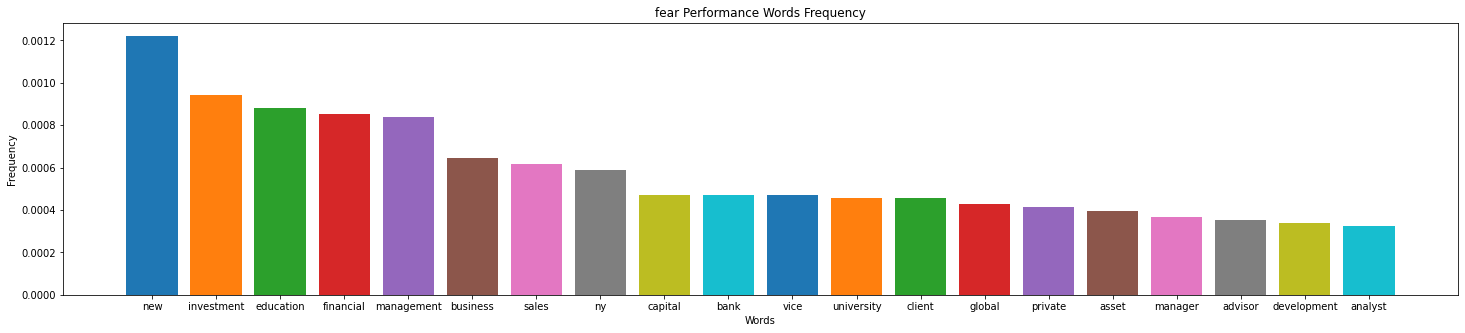

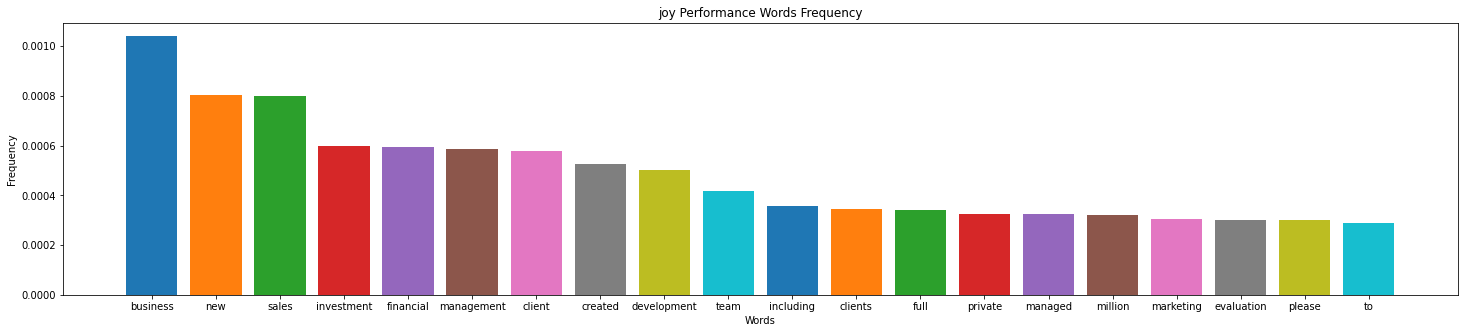

In [45]:
for c in ['fear','joy']:
    d = sorted(frequency[c].items(), key=lambda item: item[1],reverse = True)
    plt.figure(figsize = (25,5))

    for i in range(20):
        plt.bar(d[i][0],d[i][1]/l[c])
    plt.title(c + ' Performance Words Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()

In [49]:
final_result = {}
for i in frequency['fear']:
    if i in frequency['joy']:
        final_result[i] = (frequency['fear'][i]/l['fear'])/(frequency['joy'][i]/l['joy'])

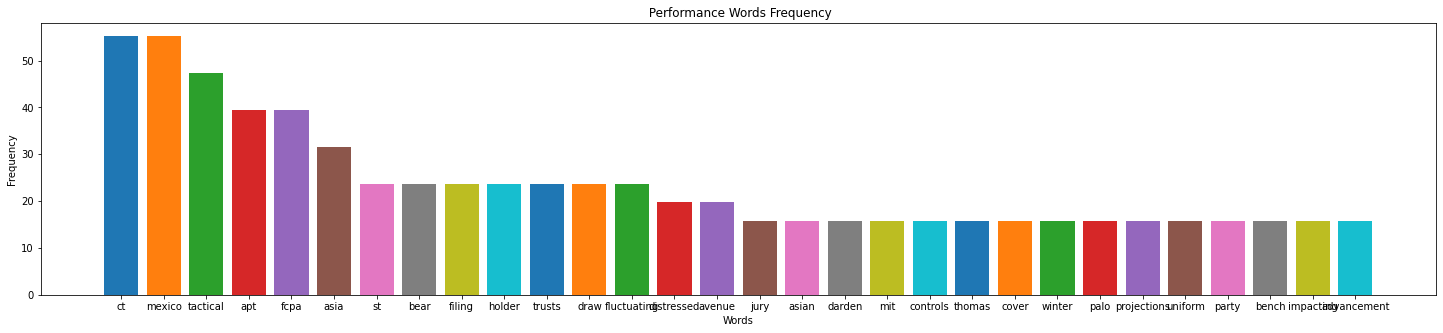

In [52]:
d = sorted(final_result.items(), key=lambda item: item[1],reverse = True)
plt.figure(figsize = (25,5))

for i in range(30):
    plt.bar(d[i][0],d[i][1])
plt.title(' Performance Words Frequency')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()